# **Life Expectancy Regression**
**Project  Title:** Life Expectancy Regression Model

**Course:** Machine Learning for the Life Sciences (BSCI238I) – Fall 2025

**Author:** Catherine Smith

### **Background**

This project develops a machine-learning model that predicts life expectancy using global health indicators from the World Health Organization (WHO) and United Nations (UN).

Using regression modeling, data cleaning, feature engineering, standardization, SGD-based training, and evaluation, the project identifies which variables most strongly predict life expectancy across 193 countries from 2000–2015.

This project demonstrates:

* Data cleaning & preprocessing

* Exploratory data analysis

* Correlation-based feature selection

* Train/val/test splitting

* Standardization

* Linear regression with stochastic gradient descent

* Model evaluation (MSE, R², residual analysis)

* Model interpretation with standardized & unstandardized coefficients

### **Dataset**

Global Health Observatory data repository under the World Health Organization (WHO), spanning 193 countries from 2000-2015.

### **References**



1.   [Kaggle -- Life Expectancy (WHO) Dataset](https://https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who)
2.   [Google Machine Learning Crash Course -- Linear Regression Notebook](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_taxi.ipynb?utm_source=mlcc&utm_campaign=colab-external&utm_medium=referral&utm_content=linear_regression#scrollTo=X53vZqc7PxCA)



### **Load + visualize dataset**

In [1]:
# load pandas
import pandas as pd

# load the dataset as a CSV file
data = pd.read_csv("Life Expectancy Data.csv")

# visualize the dataset
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [2]:
# print each column in the data
for c in data.columns:
  print(c)

Country
Year
Status
Life expectancy 
Adult Mortality
infant deaths
Alcohol
percentage expenditure
Hepatitis B
Measles 
 BMI 
under-five deaths 
Polio
Total expenditure
Diphtheria 
 HIV/AIDS
GDP
Population
 thinness  1-19 years
 thinness 5-9 years
Income composition of resources
Schooling


### **Data cleaning**

In [3]:
# remove rows with missing data (na)
data = data.dropna()

# get the total number of rows in data
print('Total number of rows after cleaning: ', len(data.index))

Total number of rows after cleaning:  1649


### **Correlation matrix**

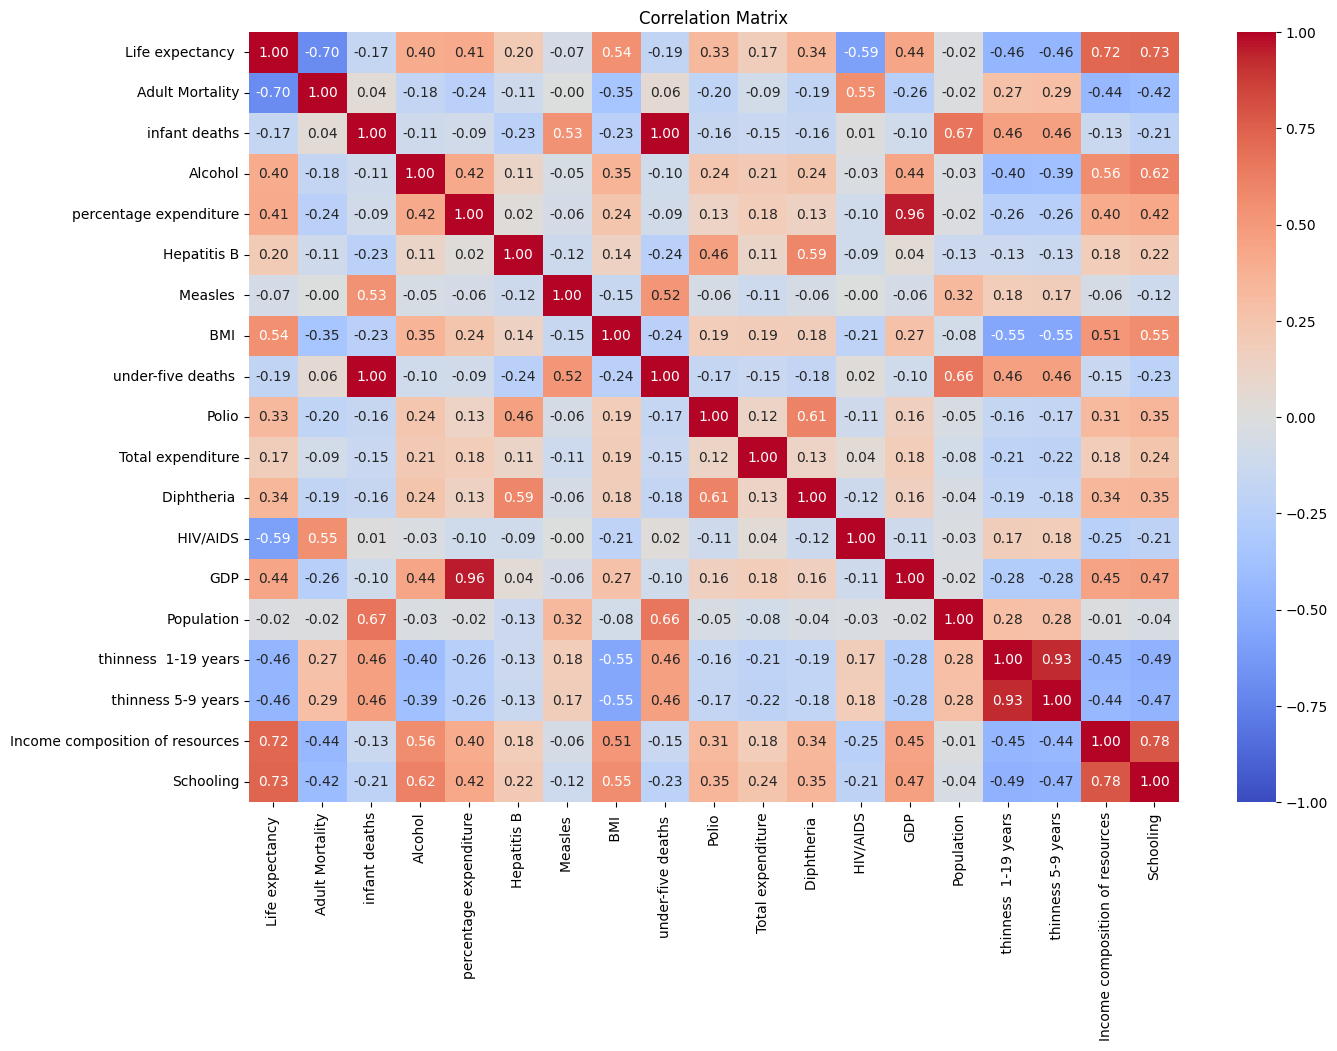

In [4]:
# import libraries to generate and display the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

# drop non-feature and non-numeric columns before calculating the correlation matrix
corr_data = data.drop(['Country', 'Status', 'Year'], axis=1)

# generate the correlation matrix on our data
corr_matrix = corr_data.corr()

# display the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

### **Select features**

Chosen features: Adult Mortality, Schooling, Income Composition of Resources
* Strongest correlations with life expectency, so they are likely good predictors.

In [5]:
x_vars = ["Adult Mortality", "Schooling", "Income composition of resources"]

### **Split data**

*   70% training data
* 15% validation data
* 15% test data

Counts -> Train: 1154, Val: 247, Test: 248


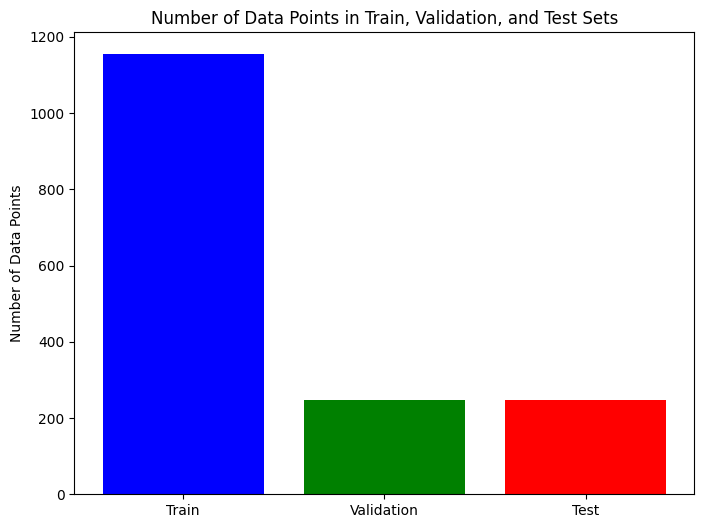

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# get only the selected X and Y columns from the dataset
X = data[x_vars]
Y = data["Life expectancy "]

# Combine X and Y into a single DataFrame to drop rows with NaNs in either X or Y
combined_data = pd.concat([X, Y], axis=1).dropna()

# Separate X and Y again after dropping NaNs
X = combined_data[x_vars].values
Y = combined_data["Life expectancy "].values

n = len(combined_data)            # get total number of rows in data after dropping NaNs
rng = np.random.default_rng(42)   # set seed for reproducibility
indices = np.arange(n)
rng.shuffle(indices)              # shuffle the rows

# compute split sizes
n_train = int(n * 0.70)           # 70% training
n_val   = int(n * 0.15)           # 15% validation
n_test  = n - n_train - n_val     # remaining ~15% testing

# specify index ranges
idx_train = indices[:n_train]
idx_val   = indices[n_train:n_train + n_val]
idx_test  = indices[n_train + n_val:]

# create split
X_train, y_train = X[idx_train], Y[idx_train]
X_val,   y_val   = X[idx_val],   Y[idx_val]
X_test,  y_test  = X[idx_test],  Y[idx_test]

# print the number of data points in each set
print(f"Counts -> Train: {len(X_train)}, Val: {len(X_val)}, Test: {len(X_test)}")

# display a bar graph of the number of data points in each set
labels = ['Train', 'Validation', 'Test']
counts = [len(X_train), len(X_val), len(X_test)]
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['blue', 'green', 'red'])
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points in Train, Validation, and Test Sets')
plt.show()

### **Standardize data**

* Rescaling features so that they all have a similar range of values, with a mean of 0 and a standard deviation of 1.

In [7]:
from sklearn.preprocessing import StandardScaler

# standardize all the values in the dataset using the mean and standard deviation of the training set
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s   = scaler.transform(X_val)
X_test_s  = scaler.transform(X_test)

In [8]:
# get the scaled features that you selected
X_train_s_df = pd.DataFrame(X_train_s, columns=x_vars, index=data.index[idx_train])

# get the corresponding life expectancy values
y_train_srs = pd.Series(y_train, index=data.index[idx_train], name="Life Expectancy")

# merge the X and Y values into one table
train_view = pd.concat([X_train_s_df, y_train_srs], axis=1)

# display the table
train_view

,Adult Mortality,Schooling,Income composition of resources,Life Expectancy
2051,-0.218722,1.164410,0.915570,74.7
908,0.343427,0.658814,0.389804,68.3
2677,-1.194676,0.514358,0.216355,73.7
265,0.109199,0.080990,0.351862,69.4
1253,-0.788679,2.320058,1.452177,85.0
...,...,...,...,...
2207,-0.187491,0.297674,0.330181,72.5
346,3.091713,-0.063465,-0.184745,51.7
2852,-0.039146,-0.532947,-3.398965,69.9
404,0.819693,-1.941393,-1.355523,58.1


## **Train Model**

### **Model set-up**

* Using the SGDRegressor architecture from scikit-learn to iteratively fit a linear model using Stochastic Gradient Descent (SGD).

In [9]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

# define an iterative linear regression model
sgd = SGDRegressor(
    loss="squared_error",       # specify the loss function: mean squared error
    learning_rate="constant",   # specify a constant learning rate
    eta0=0.0001,                # choose the value of the learning rate
    random_state=42,            # seed random for reproducibility
)

# initialize values
n_epochs = 100                  # specify the number of epochs
rng = np.random.default_rng(42)
train_mse_hist, val_mse_hist, val_r2_hist = [], [], []
best_val_mse   = np.inf
best_epoch     = -1
best_coef      = None
best_intercept = None

In [10]:
# iterative training loop
for epoch in range(1, n_epochs + 1):
    perm = rng.permutation(len(X_train_s))
    Xb, yb = X_train_s[perm], y_train[perm]
    sgd.partial_fit(Xb, yb)                  # fit X values to Y values
    y_train_pred = sgd.predict(X_train_s)
    y_val_pred   = sgd.predict(X_val_s)

    # compute error and r^2 metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    val_mse   = mean_squared_error(y_val,   y_val_pred)
    val_r2    = r2_score(y_val, y_val_pred)

    # save these metrics to reference later
    train_mse_hist.append(train_mse)
    val_mse_hist.append(val_mse)
    val_r2_hist.append(val_r2)

    # output metrics to the screen
    print(f"Epoch {epoch:3d}/{n_epochs} | "
          f"Train MSE: {train_mse:.6f} | Val MSE: {val_mse:.6f} | Val R²: {val_r2:.4f}")

    # save this model if it has the lowest loss so far
    if val_mse < best_val_mse:
        best_val_mse   = val_mse
        best_epoch     = epoch
        best_coef      = np.copy(sgd.coef_)
        best_intercept = float(sgd.intercept_[0])

Epoch   1/100 | Train MSE: 3843.579826 | Val MSE: 3979.072599 | Val R²: -65.9054
Epoch   2/100 | Train MSE: 3049.334499 | Val MSE: 3156.212575 | Val R²: -52.0696
Epoch   3/100 | Train MSE: 2421.173648 | Val MSE: 2506.369617 | Val R²: -41.1429
Epoch   4/100 | Train MSE: 1923.993070 | Val MSE: 1992.911173 | Val R²: -32.5095
Epoch   5/100 | Train MSE: 1530.179147 | Val MSE: 1586.464624 | Val R²: -25.6753
Epoch   6/100 | Train MSE: 1218.101132 | Val MSE: 1264.507898 | Val R²: -20.2618
Epoch   7/100 | Train MSE: 970.729680 | Val MSE: 1009.341655 | Val R²: -15.9714
Epoch   8/100 | Train MSE: 774.489689 | Val MSE: 806.789987 | Val R²: -12.5656
Epoch   9/100 | Train MSE: 618.853724 | Val MSE: 646.044397 | Val R²: -9.8628
Epoch  10/100 | Train MSE: 495.407694 | Val MSE: 518.342245 | Val R²: -7.7156
Epoch  11/100 | Train MSE: 397.439206 | Val MSE: 416.863160 | Val R²: -6.0093
Epoch  12/100 | Train MSE: 319.689368 | Val MSE: 336.148902 | Val R²: -4.6521
Epoch  13/100 | Train MSE: 257.971486 | Val

### **Model selection**

In [11]:
# get the best model from the training loop
if best_coef is not None:
    sgd.coef_ = best_coef                                       # weights
    sgd.intercept_ = np.array([best_intercept], dtype=float)    # bias term

# output the best-performance epoch
print(f"\nBest epoch: {best_epoch} | "
      f"Val MSE: {best_val_mse:.6f} | "
      f"Val R²:  {val_r2_hist[best_epoch-1]:.4f}")


Best epoch: 80 | Val MSE: 16.128711 | Val R²:  0.7288


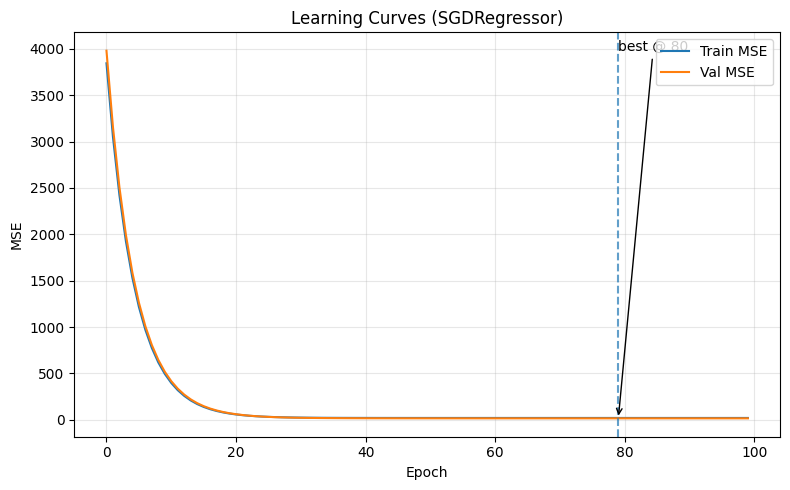

In [12]:
# graph the learning curves
fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.plot(train_mse_hist, label="Train MSE")
ax1.plot(val_mse_hist,   label="Val MSE")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("MSE")
ax1.legend(loc="upper right")
ax1.grid(True, alpha=0.3)

# mark the best epoch on the learning curve
ax1.axvline(best_epoch-1, linestyle="--", alpha=0.7)
ax1.annotate(f"best @ {best_epoch}", xy=(best_epoch-1, val_mse_hist[best_epoch-1]),
             xytext=(best_epoch-1, max(val_mse_hist)),
             arrowprops=dict(arrowstyle="->", lw=1))

plt.title("Learning Curves (SGDRegressor)")
plt.tight_layout()
plt.show()

## **Evaluate Model**

In [13]:
# get the weights (coefficients)
w = sgd.coef_.ravel()

# get the bias term (intercept)
b = float(sgd.intercept_.ravel()[0])

# put the equation together
eq_std = "y = {:.6f} ".format(b) + " ".join(
    f"+ ({wj:.6f})*{name}" for wj, name in zip(w, x_vars)
)

# display the equation
print("Regression Equation in standardized space:")
print(eq_std)

Regression Equation in standardized space:
y = 69.059604 + (-3.975359)*Adult Mortality + (3.013132)*Schooling + (2.257291)*Income composition of resources


In [14]:
# get the original means and standard deviations of the dataset
mu = scaler.mean_
sigma = scaler.scale_

# scale all the weights and bias term
w_orig = w / sigma
b_orig = b - np.sum(w * mu / sigma)

# print the unstandardized regression equation
print("\nLinear model on original feature scale:")
print(f"y = {b_orig:.6f} " + " ".join([f"+ ({w_j:.6f})*{name}" for w_j, name in zip(w_orig, x_vars)]))


Linear model on original feature scale:
y = 53.523705 + (-0.031038)*Adult Mortality + (1.088162)*Schooling + (12.235129)*Income composition of resources


### **Test model**

In [15]:
# evaluate the model on the test set
y_test_pred = sgd.predict(X_test_s)
test_mse = mean_squared_error(y_test, y_test_pred)  # compute the loss
test_r2  = r2_score(y_test, y_test_pred)            # compute the r^2 value

# display error and r^2 values for the test set
print(f"Test MSE: {test_mse:.6f} | Test R²: {test_r2:.4f}")

Test MSE: 20.331783 | Test R²: 0.7647


* The model scored a R^2 value of 0.7647. This means that ~76% of the variation in life expectency can be explained by the independent variables chosen (adult mortality, schooling, and income composition of resources). This is relatively good, but also means that the remaining 24% of the variation is not explained by the model.

In [16]:
# get predicted and true values for each data point in the test set
test_index = data.index[idx_test]
results = pd.DataFrame({
    "y_true": Y[idx_test],
    "y_pred": y_test_pred
}, index=test_index)

# compute residuals and absolute error
results["residual"]  = results["y_true"] - results["y_pred"]
results["abs_error"] = results["residual"].abs()

# add in the X variables to the table
X_test_df = pd.DataFrame(X_test, columns=x_vars, index=test_index)
results_with_feats = X_test_df.join(results)

# add in the country names and years
meta = data.loc[test_index, ["Country", "Year"]]
results_with_meta = pd.concat([meta, results_with_feats], axis=1)

# display the table
results_with_meta

,Country,Year,Adult Mortality,Schooling,Income composition of resources,y_true,y_pred,residual,abs_error
2206,Samoa,2009,172.0,12.9,0.691,76.0,70.676910,5.323090,5.323090
38,Algeria,2009,123.0,13.1,0.705,74.4,72.586703,1.813297,1.813297
754,Djibouti,2014,252.0,6.3,0.467,63.0,58.271321,4.728679,4.728679
1730,Mongolia,2001,266.0,9.4,0.588,63.2,62.690540,0.509460,0.509460
995,Germany,2014,69.0,17.0,0.920,89.0,81.137147,7.862853,7.862853
...,...,...,...,...,...,...,...,...,...
233,Belarus,2006,243.0,14.6,0.723,68.9,70.714602,-1.814602,1.814602
1267,Israel,2014,6.0,16.0,0.895,82.2,81.698510,0.501490,0.501490
2737,Ukraine,2008,273.0,14.9,0.730,67.7,70.195552,-2.495552,2.495552
2916,Zambia,2005,554.0,10.7,0.467,49.3,53.685716,-4.385716,4.385716
